In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 11 ('lines.color: #0C479D'): Key lines.color: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 15 ('patch.edgecolor: #FFFFFF'): Key patch.edgecolor: '' does not look like a color arg
Bad value in file WindowsPath('C:/Users/KNHOFFM/.matplotlib/stylelib/xom.mplstyle'), line 16 ('patch.facecolor: #0C479D'): Key patch.facecolor: '' does not look like a color arg


## Datastructures
Pandas has two primary data structures: Series and DataFrames.  A DataFrame is made up of Series which create the columns.  Series are 1D objects while DataFrames are 2D objects.  The intent of this section is just an introduction to the primary Datastructures in Pandas, which will be leveraged throughout the book.

### Series
We start with Series since this is the fundamental building block of the pandas environment.  All Series have dtypes, indexes, names and methods and accessors to facilitate accessing and shaping data.

In [2]:
# integer based index with unnamed series
songs2 = pd.Series([145, 142, 38, 13])
songs2

0    145
1    142
2     38
3     13
dtype: int64

In [3]:
songs2.index

RangeIndex(start=0, stop=4, step=1)

In [4]:
# object based index with named Series
songs3 = pd.Series([145, 142, 38, 13],
                  name = 'counts',
                  index = ['Paul', 'John', 'George', 'Ringo'])

In [5]:
songs3

Paul      145
John      142
George     38
Ringo      13
Name: counts, dtype: int64

In [6]:
songs3.index

Index(['Paul', 'John', 'George', 'Ringo'], dtype='object')

>**Note**: Series data does not have to be homogeneus, but when they are it improves computational speed allowing vectorized operations. 

In [7]:
class foo:
    pass

In [8]:
ringo = pd.Series(['Richard', 'Starky', 13, foo()],
                 name='ringo')

In [9]:
ringo

0                                        Richard
1                                         Starky
2                                             13
3    <__main__.foo object at 0x000001395CCC6F40>
Name: ringo, dtype: object

### DType discussions
What is important above is the note that the default lowest level type is object.  This is a catch all for non homogeneous dtypes or string types.  If you Series is supposed to have integers, the dtype is object, they should be converted to ensure the expected behavior occurs when conducting analysis of the data.  

In [10]:
s1 = pd.Series(['1','2','3','4'],
              name='str_nums')
s2 = pd.Series([1, 2, 3, 4],
              name='int_nums')

In [11]:
def add():
    return s1 + s2

try:
    print(add())
except TypeError:
    print('incompatible types: can only concatenate str (not "int") to str')

incompatible types: can only concatenate str (not "int") to str


In [12]:
def add():
    # converting dtype for Series S1 allows us to add as expected
    return s1.astype('int') + s2

try:
    print(add())
except TypeError:
    print('incompatible types: can only concatenate str (not "int") to str')

0    2
1    4
2    6
3    8
dtype: int64


In [13]:
def add():
    # converting dtype for Series S2 allows us to add/concat as expected
    return s1 + s2.astype('str')

try:
    print(add())
except TypeError:
    print('incompatible types: can only concatenate str (not "int") to str')

0    11
1    22
2    33
3    44
dtype: object


### The Nan value
Frustrating and useful, Not a number or Nan is a numpyism that translates into pandas.  This particular value is used when pandas infers a numeric dtype, but cannot resolve an entry into a number for the Series.  If there are nans, the dtype will be moved to a float inplace of an interger.  Here is an example to help things along:

In [14]:
nan_series = pd.Series([2, np.nan],
                      index = ['Ono', 'Claptain'])
nan_series

Ono         2.0
Claptain    NaN
dtype: float64

In [15]:
# nan are ignored in method and function calls
nan_series.count(), nan_series.sum()

(1, 2.0)

In [16]:
# nan are included in attributes and index references
nan_series.shape, nan_series.index, nan_series[1]

((2,), Index(['Ono', 'Claptain'], dtype='object'), nan)

In [17]:
# int64 is the default integer type and does not support nan
# Int64 can be specified to allow nan values and ints to coexist
nan_series2 = pd.Series([2, np.nan],
                      index = ['Ono', 'Claptain'],
                       dtype='Int64')
nan_series2

Ono            2
Claptain    <NA>
dtype: Int64

In [18]:
# the behavior of nans is still the same
nan_series2.count(), nan_series2.sum(), nan_series2.shape

(1, 2, (2,))

### Numpy array and Pandas Series
Cousins with similar but not identical behavior

In [19]:
numpy_ser = np.array([145, 142, 38, 13])

In [20]:
songs3[1]

142

In [21]:
numpy_ser[1]

142

In [22]:
songs3.mean()

84.5

In [23]:
numpy_ser.mean()

84.5

### Fancy indexing and masking
This is a way to filter the items of an array or Series using a boolean equivalent and returning the True value by default

In [24]:
mask = songs3 > songs3.median()
mask

Paul       True
John       True
George    False
Ringo     False
Name: counts, dtype: bool

In [25]:
# filtering the original Series values 
songs3[mask]

Paul    145
John    142
Name: counts, dtype: int64

In [26]:
# numpy equivalent operations
numpy_ser[numpy_ser > np.median(numpy_ser)]

array([145, 142])

### Categorical Data
While this is not common, it can help pandas process and manipute the data types.  There are advantages in memory, performance,  inferrable ordering, operations and membership of the data.  This requires a limited number of values to classify as categorical

In [27]:
s = pd.Series(['l', 'm', 's', 'xs', 'xl'],
             dtype='category')
s

0     l
1     m
2     s
3    xs
4    xl
dtype: category
Categories (5, object): ['l', 'm', 's', 'xl', 'xs']

In [28]:
s.cat.ordered

False

In [29]:
# by default they are unordered, but this can be programatically applied.  Missing values will be replaced with nan
s2 = pd.Series(['l', 'm', 's', 'xs', 'xl'],
             dtype='category')
size_type = pd.api.types.CategoricalDtype(categories=['s','m','l'], 
                                          ordered=True)
s3 = s2.astype(size_type)
s3

0      l
1      m
2      s
3    NaN
4    NaN
dtype: category
Categories (3, object): ['s' < 'm' < 'l']

In [30]:
# ordered categories allow comparisons, using s for small
s3 > 's'

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [31]:
# direct ordering information can be added to the categorical data
s.cat.reorder_categories(['xs','s','m','l','xl'],
                        ordered = True)

0     l
1     m
2     s
3    xs
4    xl
dtype: category
Categories (5, object): ['xs' < 's' < 'm' < 'l' < 'xl']

### Chapter 4 Exercises
1. Create a Series with the temperature values for the last seven days, then filter everything below the mean
2. Create a Series with your favorite colors using a categorical type

In [32]:
import html5lib

In [33]:
temp = pd.Series([67.5, 67.9, 53.5, 48.8, 54.8, 66.3, 69.1],
                index = pd.date_range("2022-10-16", periods=7, freq="D"))
temp

2022-10-16    67.5
2022-10-17    67.9
2022-10-18    53.5
2022-10-19    48.8
2022-10-20    54.8
2022-10-21    66.3
2022-10-22    69.1
Freq: D, dtype: float64

<AxesSubplot: >

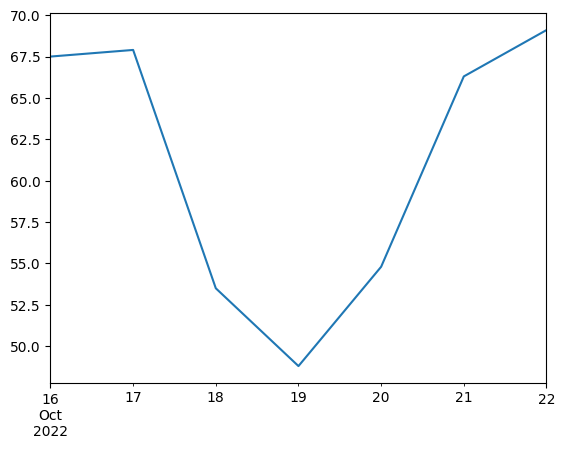

In [34]:
temp.plot()

In [35]:
temp[temp > temp.mean()]

2022-10-16    67.5
2022-10-17    67.9
2022-10-21    66.3
2022-10-22    69.1
dtype: float64

In [36]:
pd.Series(['orange', 'blue', 'green'], dtype='category')

0    orange
1      blue
2     green
dtype: category
Categories (3, object): ['blue', 'green', 'orange']

## Chapter 5: Series Deep Dive
There are many different possible opreations with series.  In this chapter we will load and analyze data from the US Fuels Economy website to use to demonstrate to many different functions.

This will be loaded from Matt's Github since this will ensure the datastructure and location are static.

In [37]:
df = pd.read_csv('vehicles.csv')

c:\users\knhoffm\.virtualenvs\python_for_engineer_science\lib\site-packages\IPython\core\interactiveshell.py:3378: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
city_mpg = df.city08
hwy_mpg = df.highway08

In [39]:
city_mpg

0        19
1         9
2        23
3        10
4        17
         ..
45639    19
45640    20
45641    18
45642    18
45643    16
Name: city08, Length: 45644, dtype: int64

In [40]:
hwy_mpg

0        25
1        14
2        33
3        12
4        23
         ..
45639    26
45640    28
45641    24
45642    24
45643    21
Name: highway08, Length: 45644, dtype: int64

In [41]:
# how many series attributes
len(dir(city_mpg))

419

## Operators (& Dunder methods)
There are many different operators and dunder (double underscore) methods built into the python and pandas library.  Here the effort will be to understand why pure python differs from pandas methods (vectorization) and what the advantages are for doing more with the pandas approach.  We will start with a simple example of what is going on under the hood.

In [42]:
# simple python
2 + 4

6

In [43]:
# this is what actually happens since int class in base python as the .__add__() method represented by '+'
(2).__add__(4)

6

In [44]:
# a Series in pandas has the same method, along with divide, multiply and so on, but it is vectorized
# notice the result is a float due to division
mean_mpg = (city_mpg + hwy_mpg)/2
mean_mpg

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
45639    22.5
45640    24.0
45641    21.0
45642    21.0
45643    18.5
Length: 45644, dtype: float64

### Index Alignment
Pandas uses index alignment to conduct is mathmatical (add really all) operations. It looks to match up records.  This is easy if the data is columns in a DataFrame, but can create complications if matching to different data sets together with different indexes.  A demonstration of index alignment:

In [45]:
s1 = pd.Series([10, 20, 30], index = [1, 2, 2])
s2 = pd.Series([35, 44, 53], index = [2, 2, 4])
print(s1)
print(s2)

1    10
2    20
2    30
dtype: int64
2    35
2    44
4    53
dtype: int64


> **Note**: Since the indexes are not unique, it will return a combinatoric explosion of index entries.  The first series 2 value will match each 2 index in turn, followed by the second index 2 value matching the values again.

In [46]:
s1 + s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

### Broadcasting
When conducting mathmatical operations, pandas will broadcast the scalar or operation across all values in the Series.  This is done through vectorization, and happens through an optimized process at the CPU level called SIMD (Single Instruction Multiple Data).  This advantage is available across all of the standard mathmatical operations and logical comparison operators.

In [47]:
c1 = s1
c1.reset_index()
(pd.DataFrame(c1, columns=['c1'])
 .assign(col2 = lambda df: df.c1 + 3)     # addition
 .assign(col3 = lambda df: df.c1 - 3)     # subtraction
 .assign(col4 = lambda df: df.c1 ** 2)    # power
 .assign(col5 = lambda df: df.c1 ** 0.5)  # power
 .assign(col6 = lambda df: df.c1 // 2)    # floor division
)

,c1,col2,col3,col4,col5,col6
1,10,13,7,100,3.162278,5
2,20,23,17,400,4.472136,10
2,30,33,27,900,5.477226,15


### Iteration
There is also and iteration method, but in general you should not use a for loop construct on any data in pandas.  This takes you away from vectorization and back into pure python loosing all the speed advantages discussed above.

### Operator methods versus standard calls
Pandas offers methods as well as the call to the standard operator to give the user more options for customizing the call.  In most cases there is a fill value assumed (Na typically) that can be leveraged to improve the return value.

In [48]:
s1 + s2

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

In [49]:
s1.add(s2)

1     NaN
2    55.0
2    64.0
2    65.0
2    74.0
4     NaN
dtype: float64

In [50]:
s1.add(s2, fill_value = 0)

1    10.0
2    55.0
2    64.0
2    65.0
2    74.0
4    53.0
dtype: float64

### Chaining
Chaining is connect various operations end to end to show what each step completes in an effort to make the transformation more readily visible.  This is the key element of the work process for Effective Pandas work.  Chaining must be mastered to improve the cost and make the overall processing easier to recreate or fix.

In [51]:
(city_mpg + hwy_mpg)/2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
45639    22.5
45640    24.0
45641    21.0
45642    21.0
45643    18.5
Length: 45644, dtype: float64

In [52]:
# becomes a chained operation.  This example is a demonstration of a big concept
(city_mpg
 .add(hwy_mpg)
 .div(2)
)

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
45639    22.5
45640    24.0
45641    21.0
45642    21.0
45643    18.5
Length: 45644, dtype: float64

### P-sets
1. add a numeric series to itself
2. add 10 to a numeric series
3. add a numeric series to itself with the .add() method
4. read the .add() documentation

In [53]:
p1 = pd.Series(list('123456789')).astype('int')
p1

0    1
1    2
2    3
3    4
4    5
5    6
6    7
7    8
8    9
dtype: int32

In [54]:
p1 + p1

0     2
1     4
2     6
3     8
4    10
5    12
6    14
7    16
8    18
dtype: int32

In [55]:
p1 + 10

0    11
1    12
2    13
3    14
4    15
5    16
6    17
7    18
8    19
dtype: int32

In [56]:
(p1
 .add(p1)
)

0     2
1     4
2     6
3     8
4    10
5    12
6    14
7    16
8    18
dtype: int32

In [57]:
# p1.add?

## Aggregate Methods
Most often, the level of detail in a Series is to granular for higher level reporting.  It is not critical to know a specific record value when determining trends and overall properties of the system.  To this end, pandas has many different aggregation methods for summarizing data at a scalar or grouped level.

In [58]:
# some examples of scalar aggregation to a single value
city_mpg.mean(), city_mpg.count(), city_mpg.sum()

(19.052602751730785, 45644, 869637)

In [59]:
# aggregate property examples
city_mpg.is_monotonic, city_mpg.is_unique

(False, False)

### Quantile
One of the more powerful aggregations is the quantile method.  It can provide the midpoint by default, or you can specify a list of return values.

In [60]:
city_mpg.quantile(), city_mpg.quantile([0.2, 0.4, 0.6, 0.8])

(17.0,
 0.2    14.0
 0.4    16.0
 0.6    19.0
 0.8    22.0
 Name: city08, dtype: float64)

### Chaining to determine subsets
In some instances you only want the aggregate of a subset of the data in the Series.  This is where chaining can provide a nice methodology for downselecting and aggregating.

In [61]:
# number mpg cars over 20mpg
(city_mpg
 .gt(20) #masking filter
 .sum()
)

12405

In [62]:
# percentage of mpg cars over 20mpg
(city_mpg
 .gt(20) # masking filter
 .mul(100) # multiply boolean values (0/1 equiv) by 100 
 .mean() # take the mean
)

27.1777232494961

In [63]:
# median mpg of mpg cars over 20mpg
(city_mpg
 [city_mpg.gt(20)]
 .median()
)

23.0

### .Agg() method
This is the catch all aggregation method that accepts predefined methods and user defined functions.  This is a very flexible method, and should be kept handy for any pandas analysis work needing aggregation.

In [64]:
city_mpg.agg('mean')

19.052602751730785

In [65]:
# central tendancy of the data related to relationship of mean and median
def mean_med_r(s):
    return (s.mean())/(s.median())

city_mpg.agg(mean_med_r)

1.120741338337105

<AxesSubplot: ylabel='Frequency'>

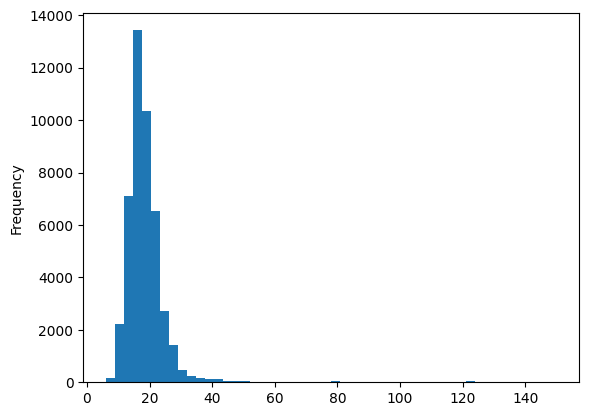

In [66]:
(city_mpg
 .plot
 .hist(bins=50)
)

### Other Aggregation methods
There are many other aggregation methods avaialble through pandas.  A sampling is shown below, but it is very likely that there is a method when you are looking for a way to summarize data.

In [67]:
# dataset correlation with itself shift by 1, default
city_mpg.autocorr()

0.5618709959331084

In [68]:
# truth value for the series for all or any (i.e. 1 or more).  Non zero numbers are true
city_mpg.all(), city_mpg.any()

(True, True)

In [69]:
# correlation coefficient or covariance between data vectors (no surprise that city and hwy mpg correlate)
city_mpg.corr(hwy_mpg), city_mpg.cov(hwy_mpg)

(0.9540877018932107, 88.31243935607655)

In [70]:
city_mpg.min(), city_mpg.max(), city_mpg.mean(), city_mpg.median()

(6, 150, 19.052602751730785, 17.0)

In [71]:
# statistical measures standard error, standard dev, variance, skew, and kurtosis
city_mpg.sem(), city_mpg.std(), city_mpg.var(), city_mpg.kurtosis()

(0.04710551617131937,
 10.063837494540289,
 101.28082511651498,
 64.06064136978965)

### P-set Chapter 7
This is all to be conducted with a dataset of your choice
1. Find the count of non missing values in a series
2. Find the number of entries in a series
3. Find the number of unique entries in a series
4. Find the mean value of a series
5. Find the maximum value of a series
6. Use the .agg() method to find all of the above data

In [72]:
cyl = df.cylinders
cyl.count()

45188

In [73]:
cyl.size

45644

In [74]:
cyl.nunique()

9

In [75]:
cyl.mean()

5.710675400548818

In [76]:
cyl.max()

16.0

In [77]:
cyl.agg(['count','size','nunique','mean','median','max','min'])

count      45188.000000
size       45644.000000
nunique        9.000000
mean           5.710675
median         6.000000
max           16.000000
min            2.000000
Name: cylinders, dtype: float64

## Dtype Conversion methods
There are a number of options for data type assignment in pandas.  In many cases, there is not one right answer.  The general idea is to leverage the datatype that facilitates the use case for the information.  This was touched on earlier to describe and demonstrate some of the functionality around missing values and categorical information.  Here we will expand on that information.

In [78]:
city_mpg.dtype

dtype('int64')

In [79]:
# This conversion adds or moves to pandas types that supports pd.NA types
city_mpg.convert_dtypes().dtype

Int64Dtype()

In [80]:
# for more explicit control, us astype() method
city_mpg.astype('Int16').dtype

Int16Dtype()

#### Which Dtype
Using the correct dtype can save significant amounts of memory.  The default dtype is 8bytes wide (i.e. 64 bits for both int64 and float64).  If a narrower type is used it can cut back on memory usage and more data can be stored/managed.  Numpy can provide the limits of the different dtype options.

In [81]:
np.iinfo('int64')

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [82]:
np.iinfo('uint8')

iinfo(min=0, max=255, dtype=uint8)

In [83]:
np.finfo('float64')

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [84]:
np.finfo('float16')

finfo(resolution=0.001, min=-6.55040e+04, max=6.55040e+04, dtype=float16)

### Memory usage
To compare the amount of memory employed, you can leverage the nbytes property or the .memory_usage method.  The later provides more information which is helpful when dealing with object types.

In [85]:
city_mpg.nbytes

365152

In [86]:
city_mpg.astype('int16').nbytes

91288

In [87]:
make = df.make

In [88]:
# nbytes is just the pandas series, memory_usage is the series with index
# memory_usage with deep=True is the same with the individual object value contribution
make.nbytes, make.memory_usage(), make.memory_usage(deep=True)

(365152, 365280, 2891562)

In [89]:
# converting to categorical can really help
(make
 .astype('category')
 .memory_usage(deep=True)
)

105200

### String and category types
There is the option to convert to string/object and category types within pandas.  Again, leveraging the .astype() method, the entire Series can be recast assuming the change is possible.  There are always limitation, but normally this is associated with int and float type work.  

In [90]:
city_mpg.astype('str').memory_usage(deep=True)

2693016

In [91]:
city_mpg.astype('category').memory_usage(deep=True)

96632

> **The magic of category:** When you convert string data to category data, the repeated values are not new string entries, but instead a reference back to the initial category definition.  This saves lots of space as seen above, and you still get access to the str attribute (maybe).

In [92]:
make.astype('category').str.startswith('S').value_counts()

False    43320
True      2324
Name: make, dtype: int64

### Ordered Categories
To create ordered categories, it required that a custom CategoricalIDtype.

In [93]:
# creating the unique set of values to leverage for the CategoricalDtype
values = pd.Series(sorted(set(city_mpg)))

In [94]:
# must cast as a CategoricalDtype to get this working
city_type = pd.CategoricalDtype(categories=values, ordered=True)

In [95]:
city_mpg.astype(city_type)

0        19
1         9
2        23
3        10
4        17
         ..
45639    19
45640    20
45641    18
45642    18
45643    16
Name: city08, Length: 45644, dtype: category
Categories (131, int64): [6 < 7 < 8 < 9 ... 141 < 145 < 148 < 150]

### Converting to other types
There are a handful of other dtypes which can be useful.  A few are covered below to assist with future data conversion work.

In [96]:
# Numpy array can be achieved with .to_numpy and .values
city_mpg.values == city_mpg.to_numpy()

array([ True,  True,  True, ...,  True,  True,  True])

In [97]:
# not something that should be used, but it is an option
city_mpg.to_list()[:10]

[19, 9, 23, 10, 17, 21, 22, 23, 23, 23]

In [98]:
# to dataframe can be helpful with render a view
city_mpg.to_frame()

,city08
0,19
1,9
2,23
3,10
4,17
...,...
45639,19
45640,20
45641,18
45642,18


>**Export file storage types:** There are a number of file storage types unders the to_... methods.  CSV, Excel, HDF5, SQL, JSON, and more.  These will be most often leveraged for a full DataFrame, but the functionality is equivalent.

### Psets Chapter 8
With a dataset of your choice:
1. Convert a numeric column to a smaller type
2. Calculate the memory savings by conducting the conversion to a smaller type
3. Convert a string column into a categorical type
4. Calculate the memory savings by converting to categorical type.

In [99]:
try:
    table_GDP = pd.read_html('https://en.wikipedia.org/wiki/Economy_of_the_United_States')
    us_GDP = table_GDP[3]
except:
    table_GDP = pd.read_csv('us_GDP.csv')
    us_GDP = table_GDP

In [100]:
# us_GDP.to_csv('us_GDP.csv')

In [101]:
us_GDP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             48 non-null     int64  
 1   GDP (in Bil. US$PPP)             48 non-null     float64
 2   GDP per capita (in US$ PPP)      48 non-null     float64
 3   GDP (in Bil. US$nominal)         48 non-null     float64
 4   GDP per capita (in US$ nominal)  48 non-null     float64
 5   GDP growth (real)                48 non-null     object 
 6   Inflation rate (in Percent)      48 non-null     object 
 7   Unemployment (in Percent)        48 non-null     object 
 8   Government debt (in % of GDP)    27 non-null     object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.5+ KB


In [102]:
us_GDP.iloc[0]

Year                                  1980
GDP (in Bil. US$PPP)                2857.3
GDP per capita (in US$ PPP)        12552.9
GDP (in Bil. US$nominal)            2857.3
GDP per capita (in US$ nominal)    12552.9
GDP growth (real)                    -0.3%
Inflation rate (in Percent)          13.5%
Unemployment (in Percent)             7.2%
Government debt (in % of GDP)          NaN
Name: 0, dtype: object

In [103]:
us_GDP.describe(include='all')

,Year,GDP (in Bil. US$PPP),GDP per capita (in US$ PPP),GDP (in Bil. US$nominal),GDP per capita (in US$ nominal),GDP growth (real),Inflation rate (in Percent),Unemployment (in Percent),Government debt (in % of GDP)
count,48.00,48.000000,48.000000,48.000000,48.000000,48,48,48,27
unique,NaN,NaN,NaN,NaN,NaN,32,34,29,26
top,NaN,NaN,NaN,NaN,NaN,2.3%,2.0%,5.4%,104.6%
freq,NaN,NaN,NaN,NaN,NaN,4,3,4,2
mean,2003.50,13182.360417,43192.318750,13182.360417,43192.318750,NaN,NaN,NaN,NaN
std,14.00,7817.386178,21396.888688,7817.386178,21396.888688,NaN,NaN,NaN,NaN
min,1980.00,2857.300000,12552.900000,2857.300000,12552.900000,NaN,NaN,NaN,NaN
25%,1991.75,6429.750000,25120.375000,6429.750000,25120.375000,NaN,NaN,NaN,NaN
50%,2003.50,11836.850000,40523.500000,11836.850000,40523.500000,NaN,NaN,NaN,NaN
75%,2015.25,18328.275000,57007.275000,18328.275000,57007.275000,NaN,NaN,NaN,NaN


In [104]:
(us_GDP
 .assign(Inflation = us_GDP['Inflation rate (in Percent)'].str.rstrip('%'))
 .assign(up_down = np.where(us_GDP['GDP growth (real)'].str.rstrip('%').astype('float32')>=0,'up','down'))
 .memory_usage(deep=True)
)

Index                               128
Year                                384
GDP (in Bil. US$PPP)                384
GDP per capita (in US$ PPP)         384
GDP (in Bil. US$nominal)            384
GDP per capita (in US$ nominal)     384
GDP growth (real)                  2933
Inflation rate (in Percent)        2931
Unemployment (in Percent)          2928
Government debt (in % of GDP)      2362
Inflation                          2883
up_down                            2842
dtype: int64

In [105]:
(us_GDP
 .assign(Inflation = us_GDP['Inflation rate (in Percent)'].str.rstrip('%'))
 .assign(up_down = np.where(us_GDP['GDP growth (real)'].str.rstrip('%').astype('float32')>=0,'up','down'))
 .astype({'Year': 'int16', 'GDP (in Bil. US$PPP)':'float32', 'Inflation':'float16', 'up_down':'category'})
 .memory_usage(deep=True)
)

Index                               128
Year                                 96
GDP (in Bil. US$PPP)                192
GDP per capita (in US$ PPP)         384
GDP (in Bil. US$nominal)            384
GDP per capita (in US$ nominal)     384
GDP growth (real)                  2933
Inflation rate (in Percent)        2931
Unemployment (in Percent)          2928
Government debt (in % of GDP)      2362
Inflation                            96
up_down                             276
dtype: int64

## Ch9: Manipulation methods
Manipulation methods are the workhorses of the pandas library.  These methods facilitate inspection, clean up and modeling.  Most of the methods will perform an operation on a Series and return a Series with the same index allowing it to be pushed back into the original DataFrame.

### .apply() and .where()
The .apply() method allow element wise application of a function.  While this can sometime be handy, it is not vectorized.  So, if you have a million rows, and you apply a user defined function it will be called 1 million times in the process. Not ideal, and it moves you back toward pure python speeds.  Ideally this is not used often and primarily when vectorized operations are not possible (infrequent). 

In [106]:
# user defined function to return a boolean value
def gt20(val):
    return val > 20

In [107]:
# %%timeit
city_mpg.gt(20)

0        False
1        False
2         True
3        False
4        False
         ...  
45639    False
45640    False
45641    False
45642    False
45643    False
Name: city08, Length: 45644, dtype: bool

In [108]:
# %%timeit
city_mpg.apply(gt20)

0        False
1        False
2         True
3        False
4        False
         ...  
45639    False
45640    False
45641    False
45642    False
45643    False
Name: city08, Length: 45644, dtype: bool

As shown above, the difference in execution of each code cell is significant.  If it is possible to use vectorized operations, this should always be the first choice.

### .where()
The .where() method is an option when you are attempting to apply control logic in a vectorized mannor.  It is very similar to an if, then control structure.  While it does not allow multiple levels in a single call, the output could be passed to another .where() nested within the original structure. Here is an example comparing .apply() to .where().

In [109]:
# top five makes by count
top5 = make.value_counts().index[:5]

In [110]:
# user defined function
def generalize_top5 (val, top5 = top5):
    if val in top5:
        return val
    return 'Other'

In [111]:
# %%timeit
make.apply(generalize_top5)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
45639    Other
45640    Other
45641    Other
45642    Other
45643    Other
Name: make, Length: 45644, dtype: object

In [112]:
# %%timeit
make.where(~make.isin(top5),'Other')

0        Alfa Romeo
1           Ferrari
2             Other
3             Other
4            Subaru
            ...    
45639        Subaru
45640        Subaru
45641        Subaru
45642        Subaru
45643        Subaru
Name: make, Length: 45644, dtype: object

### If Else control structures in Pandas
This is a shortcoming in the pandas ecosystem.  If there was an interest in keeping the top 5 makes, then designating a top10 make, then followed by other for anything else, this would be beyond the base vectorization options.  

In [113]:
top5

Index(['Chevrolet', 'Ford', 'GMC', 'Dodge', 'Toyota'], dtype='object')

In [114]:
top10 = make.value_counts().index[:10]

In [115]:
def generalize(val):
    if val in top5:
        return val
    elif val in top10:
        return 'Top10'
    else:
        return 'Other'

In [116]:
make.apply(generalize)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
45639    Other
45640    Other
45641    Other
45642    Other
45643    Other
Name: make, Length: 45644, dtype: object

> **NOTE:** To replicate the above technique in pandas requires a chaining operation of the where function.

In [117]:
# .where() replaces values where condition is false with other if specified
# the call inside .where() method accesses the original make Series, but .where() modifies the return Seriesb
(make
 .where(make.isin(top5), other = 'top10')
 .where(make.isin(top10), other = 'Other')
)

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
45639    Other
45640    Other
45641    Other
45642    Other
45643    Other
Name: make, Length: 45644, dtype: object

> **ALTERNATE:** Since chaining where can be somewhat challenging to read, another alternative is the np.select() method.  It returns a np array, so it would need to be wrapped in a Series constructor

In [118]:
pd.Series(
    np.select([make.isin(top5), make.isin(top10)],
              [make,'top10'],'Other'))

0        Other
1        Other
2        Dodge
3        Dodge
4        Other
         ...  
45639    Other
45640    Other
45641    Other
45642    Other
45643    Other
Length: 45644, dtype: object

### Missing Values
Missing data is always problematic, but it is especially problematic if you are attempting to conduct machine learning.  Most models will not run with missing data, or otherwise will return inaccurate results.  There are a number of methods to address missing values within pandas.  In addition, there are more options within the machine learn and statistics libraries.

Some of the most common methods:
- .dropna(): remove the records
- .fillna(): specify a fill value (mean, median, constant, etc.)
- .ffill(): fill the missing values using the prior value
- .bfill(): fill the missing values using next value
- .interpolate(): fill with the average of the prior and next point

In [119]:
cyl = df.cylinders
(cyl
.isna()
.sum()
)

456

In [120]:
missing = cyl.isna()
make.loc[missing]

7138         Nissan
7139         Toyota
8143         Toyota
8144           Ford
8146           Ford
            ...    
39603    Volkswagen
39604    Volkswagen
39605    Volkswagen
39606    Volkswagen
39607    Volkswagen
Name: make, Length: 456, dtype: object

In [121]:
# 456 entries with 0 replacing the Nan values previously recorded for electrics.
(cyl
 .fillna(0)
 .value_counts()
)

4.0     17786
6.0     15564
8.0      9693
5.0       776
12.0      714
0.0       456
3.0       376
10.0      196
2.0        63
16.0       20
Name: cylinders, dtype: int64

### Interpolating data
Where data is numeric and represents a continuous meause of a condition, it might be prudent to interpolate between points to fill missing values.  In this case, ffill would not be an accurate representation of reality.  The classic example is temperature, where the prior and following position would indicate the direction of the temperature movement.  Clearly applying this to cyclder data would be a poor application, where the data is unrelated characteristic information.

In [122]:
temp = pd.Series([32, 33, 35, None, 38, 39, 40, 42])
temp

0    32.0
1    33.0
2    35.0
3     NaN
4    38.0
5    39.0
6    40.0
7    42.0
dtype: float64

In [123]:
temp.interpolate()

0    32.0
1    33.0
2    35.0
3    36.5
4    38.0
5    39.0
6    40.0
7    42.0
dtype: float64

### Clipping data
If there are outliers in the data, it might be prudent to clip them to ensure it does not misrepresent the overall population.  This process can be conducted using the .clip() method.

In [124]:
# this subset of the data ranges from 9 to 31 mpg, but we might want to show the 5th to 95th percentile instead
city_mpg.loc[:446].describe()

count    447.000000
mean      15.798658
std        3.286703
min        9.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       31.000000
Name: city08, dtype: float64

In [125]:
(city_mpg
 .loc[:446]
 .clip(lower=city_mpg.quantile(0.05),
      upper =city_mpg.quantile(0.95))
 .describe()
)

count    447.000000
mean      15.850112
std        3.156940
min       11.000000
25%       14.000000
50%       16.000000
75%       18.000000
max       28.000000
Name: city08, dtype: float64

### .sort_values() method
This method returns a new Series with the values in sorted order (desending or ascending).  It does not sort the index, but due to index alignment this should not create issues in further analysis. 

In [126]:
city_mpg.sort_values(ascending=False)

32570    150
33394    150
37174    150
31227    150
35478    148
        ... 
21057      6
40387      6
34523      6
41661      6
7901       6
Name: city08, Length: 45644, dtype: int64

In [127]:
# this still works due to index alignment
(city_mpg.sort_values() + hwy_mpg)/2

0        22.0
1        11.5
2        28.0
3        11.0
4        20.0
         ... 
45639    22.5
45640    24.0
45641    21.0
45642    21.0
45643    18.5
Length: 45644, dtype: float64

In [128]:
# you can also sort the index.  Below we sort_values to scramble the index, the sort_index which undoes the value sort
city_mpg.sort_values().sort_index()

0        19
1         9
2        23
3        10
4        17
         ..
45639    19
45640    20
45641    18
45642    18
45643    16
Name: city08, Length: 45644, dtype: int64

### Drop duplicates
Just as it sounds, remove duplicate entries.  Consider what you apply this to given that removal of duplicate numbers may not always be prudent or applicable to a given dataset or event a specific datatype.

In [129]:
# this has a considerable impact to the amount of data.  Options on keep value: first, last, and False (keep nothing)
city_mpg.count(), city_mpg.drop_duplicates().count()

(45644, 131)

### Ranking Data
Ranking data can have a number of uses around sorting and demonstrated relative performance.  This is still dependent on the problem being pursued, and at times may not have a bearing on the overall data evaluation.  For now, the goal is to be aware that this option does existin and can be readily leveraged to bring in a rank value.

In [130]:
# default is to use the average of the rank group
city_mpg.rank().sort_values()[:10]

41661     3.0
34523     3.0
7901      3.0
21057     3.0
40387     3.0
18594    22.5
44083    22.5
40856    22.5
13641    22.5
1990     22.5
Name: city08, dtype: float64

In [131]:
# min results in ties have the lowest rank in group, where max is highest
city_mpg.rank(method='min').sort_values()[:10]

41661    1.0
34523    1.0
7901     1.0
21057    1.0
40387    1.0
18594    6.0
44083    6.0
40856    6.0
13641    6.0
1990     6.0
Name: city08, dtype: float64

In [132]:
# dense results in ties giving group position instead of inferred rank (i.e. 1, 1, 3, 3, 4, 4 = 1, 1, 2, 2, 3, 3)
city_mpg.rank(method='dense').sort_values()[:10]

41661    1.0
34523    1.0
7901     1.0
21057    1.0
40387    1.0
18594    2.0
44083    2.0
40856    2.0
13641    2.0
1990     2.0
Name: city08, dtype: float64

### Replacing values
This is a data cleaning exercise most frequently used with object or string data.  It allows for a lot of flexibility including pattern matching using regex.

In [133]:
# Simple example
make.replace('Subaru','MONEY')

0        Alfa Romeo
1           Ferrari
2             Dodge
3             Dodge
4             MONEY
            ...    
45639         MONEY
45640         MONEY
45641         MONEY
45642         MONEY
45643         MONEY
Name: make, Length: 45644, dtype: object

In [134]:
# using paramters or dictionary, can drop the to_replace is desired
s = pd.Series([40, 20, 30, 20, 10])
s, s.replace(to_replace=[40, 10], value=[42, 9.8]), s.replace(to_replace= {40:42, 10: 9.8})

(0    40
 1    20
 2    30
 3    20
 4    10
 dtype: int64,
 0    42.0
 1    20.0
 2    30.0
 3    20.0
 4     9.8
 dtype: float64,
 0    42.0
 1    20.0
 2    30.0
 3    20.0
 4     9.8
 dtype: float64)

In [135]:
s.replace(20, 'twenty')

0        40
1    twenty
2        30
3    twenty
4        10
dtype: object

In [136]:
# regex application with capture groups and order, etc...
make.replace(r'(Fer)ra(r.*)', value=r'\2-other-\1', regex=True)

0          Alfa Romeo
1        ri-other-Fer
2               Dodge
3               Dodge
4              Subaru
             ...     
45639          Subaru
45640          Subaru
45641          Subaru
45642          Subaru
45643          Subaru
Name: make, Length: 45644, dtype: object

### Binning data
Binning data can also be useful as part of the analysis efforts.  This can be accomplished with the pd.cut() method.

In [137]:
# cut the data into 10 bins of equal range, but not count of entries. Yields a catagorical dtype
pd.cut(city_mpg,10).value_counts()

(5.856, 20.4]     33239
(20.4, 34.8]      11384
(34.8, 49.2]        485
(49.2, 63.6]        103
(121.2, 135.6]       97
(78.0, 92.4]         94
(92.4, 106.8]        82
(106.8, 121.2]       81
(63.6, 78.0]         55
(135.6, 150.0]       24
Name: city08, dtype: int64

In [138]:
# if you know the bin edges, provide those
pd.cut(city_mpg, [0, 10, 20, 40, 70, 150]).value_counts()

(10, 20]     32335
(20, 40]     11666
(0, 10]        904
(70, 150]      427
(40, 70]       312
Name: city08, dtype: int64

In [139]:
# alternative you can bin by quantiles if you want an equal distribution of entries by bin ignoring width
pd.qcut(city_mpg, 10).value_counts()

(17.0, 19.0]     7699
(5.999, 13.0]    6281
(20.0, 22.0]     4866
(14.0, 15.0]     4850
(16.0, 17.0]     4312
(15.0, 16.0]     4266
(25.0, 150.0]    3903
(22.0, 25.0]     3636
(13.0, 14.0]     3197
(19.0, 20.0]     2634
Name: city08, dtype: int64

In [140]:
# both pd.cut() class creators allow the application of labels
pd.qcut(city_mpg, 10, labels=[f'{i}-quant' for i in range(1,11)]).value_counts().sort_index()

1-quant     6281
2-quant     3197
3-quant     4850
4-quant     4266
5-quant     4312
6-quant     7699
7-quant     2634
8-quant     4866
9-quant     3636
10-quant    3903
Name: city08, dtype: int64

### Ch9 P-Sets
With a dataset of your choice.
1. Create a "Series from a numeric column that has a value of high if above the mean or low below it" using apply.
2. Create a "" using np.select
3. Time the previous two solutions to determine the faster approach.
4. Replace the missing values of a numeric series with the median value.
5. Clip the values of a numeric series between the 10th and 90th percentiles.
6. Using a categorical column, replace any value not in the top five by count with "other".
7. Using a categorical column, replace any value not in the top ten by count with "other".
8. Create a function that takes a categorical column and a number n and returns a replace series that replaces any value not in the top n frequency set with "other"
9. Using a numeric column, bin it into 10 groups of equal width.
10. Using a numeric column, bin it into 10 groups that have equal size bins (counts per bin). 

In [157]:
fifa = pd.read_csv("international_matches.csv", parse_dates=["date"])

In [163]:
fifa.tail()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0
23920,2022-06-14,Korea Republic,Egypt,Asia,Africa,29,32,1519,1500,4,...,No,Win,75.0,NaN,73.0,80.0,73.8,NaN,79.3,70.8


### P1 and P3

In [169]:
%%timeit
(fifa
.home_team_fifa_rank
.apply(lambda x: "high" if x > fifa.home_team_fifa_rank.mean() else "low")
)

2.56 s ± 220 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### P2 and P3

In [170]:
%%timeit
pd.Series(np.select([fifa.home_team_fifa_rank.gt(fifa.home_team_fifa_rank.mean())], ["high"], "low"))

4.74 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


### P4
Fill in the missing values of a numeric series with the median.

In [172]:
(fifa
 .home_team_mean_offense_score
 .fillna(fifa.home_team_mean_offense_score.median())
)

0        75.7
1        75.7
2        75.7
3        75.7
4        75.7
         ... 
23916    75.7
23917    75.7
23918    76.7
23919    75.0
23920    80.0
Name: home_team_mean_offense_score, Length: 23921, dtype: float64

### P5
Clip the values of a numeric series between the 10 and 90 percentiles

In [204]:
(fifa
 .home_team_score
 .clip(lower=fifa.home_team_score.quantile(0.10),
      upper =fifa.home_team_score.quantile(0.90))
 .value_counts()
)

1.0    7229
0.0    6273
2.0    5263
3.0    2613
4.0    2543
Name: home_team_score, dtype: int64

### P6 & P7
Using a categorical column, replace any value not in the top five by count with "other". Do it again for top 10.

In [211]:
(fifa
 .home_team
 .where(fifa.home_team.isin(fifa.home_team.value_counts().index[:5]),"Other")
 .value_counts()
)

Other             22490
Mexico              316
USA                 314
Japan               280
Saudi Arabia        272
Korea Republic      249
Name: home_team, dtype: int64

In [214]:
(fifa
 .home_team
 .where(fifa.home_team.isin(fifa.home_team.value_counts().index[:10]),"Other")
 .value_counts()
)

Other                   21299
Mexico                    316
USA                       314
Japan                     280
Saudi Arabia              272
Korea Republic            249
Qatar                     249
Oman                      241
United Arab Emirates      239
Brazil                    233
South Africa              229
Name: home_team, dtype: int64

### P8
Create a function that takes a categorical Series and a number n and replaces anything not in the top n value count with other.

In [216]:
# not an element based function, so cannot use apply method
def top_n(s, n):
    return s.where(s.isin(s.value_counts().index[:n]),"Other")

In [223]:
top_n(fifa.home_team,10).value_counts()

Other                   21299
Mexico                    316
USA                       314
Japan                     280
Saudi Arabia              272
Korea Republic            249
Qatar                     249
Oman                      241
United Arab Emirates      239
Brazil                    233
South Africa              229
Name: home_team, dtype: int64

### P9
Using a numeric column, bin it into 10 groups of equal width.

In [226]:
pd.cut(fifa.home_team_score, 10).value_counts()

(-0.031, 3.1]    21378
(3.1, 6.2]        2205
(6.2, 9.3]         269
(9.3, 12.4]         45
(12.4, 15.5]        15
(15.5, 18.6]         5
(18.6, 21.7]         2
(21.7, 24.8]         1
(27.9, 31.0]         1
(24.8, 27.9]         0
Name: home_team_score, dtype: int64

### P10
Using a numeric column, bin data into 10 groups of equal size.

In [236]:
pd.qcut(fifa.home_team_score, 10, duplicates='drop').value_counts()

(-0.001, 1.0]    13502
(1.0, 2.0]        5263
(2.0, 3.0]        2613
(3.0, 4.0]        1330
(4.0, 31.0]       1213
Name: home_team_score, dtype: int64